In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
sns.set_style('ticks')
sns.set_context('notebook', font_scale=1.5)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.interpolate as inter
import curveball

In [42]:
filename = "/home/yoavram/Google Drive/ex silico/tecan/Yoav_08022015_nolag.xlsx"
max_time = 10
sheet    = None

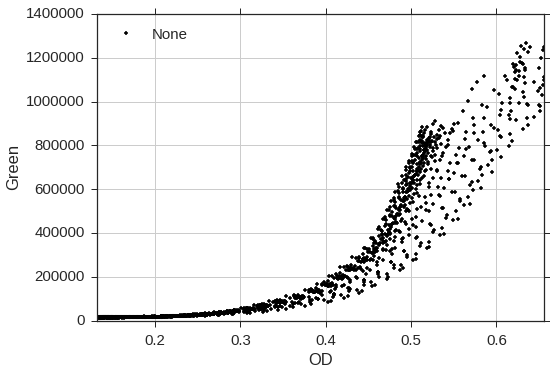

In [43]:
df = curveball.io.read_tecan_xlsx(filename, ('OD','Green'), max_time=max_time, sheet=sheet)
df = df[df.Number.isin([1,2,3,4])]
df.plot('OD','Green', color='k', marker='.', ls='')
ylabel('Green');

## B-spline approximation found by R/FDA

In [54]:
knots = pd.read_csv('Breaks.csv').x.as_matrix()
coefs = pd.read_csv('BsplineCoefs.csv').Coefs.as_matrix()
deg   = 6
rng   = (0.125, 0.6783)

In [66]:
OD    = linspace(knots[0], knots[-1])
Green = inter.splev(OD, (knots, coefs, deg), der=0, ext=0)[5:]
OD = OD[:-5]

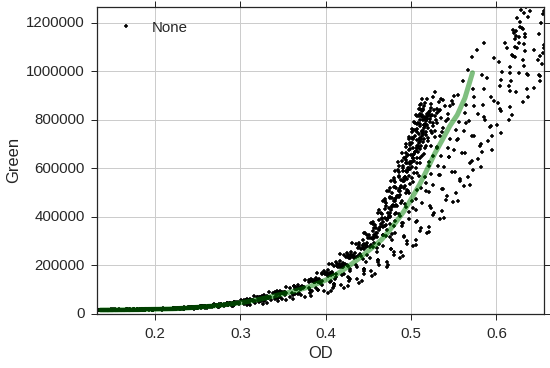

In [73]:
df.plot('OD','Green', color='k', marker='.', ls='')
plot(OD, Green, 'g', lw=5, alpha=0.5)

ylim(0,df.Green.max())
xlabel('OD')
ylabel('Green');

## B-spline approximation found by scipy

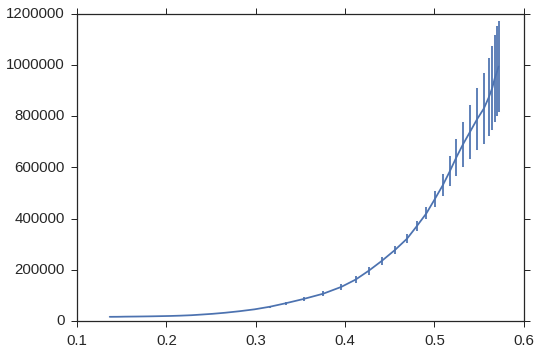

In [103]:
grp = df.groupby(by=u'Cycle Nr.')
meangrp = grp.mean().reset_index()
stdgrp  = grp.std().reset_index()

errorbar(meangrp.OD, meangrp.Green, yerr=stdgrp.Green);

In [93]:
knots,coefs, deg = inter.splrep(meangrp.OD, meangrp.Green, w=1/stdgrp.Green, k=5, task=0, s=0.1)

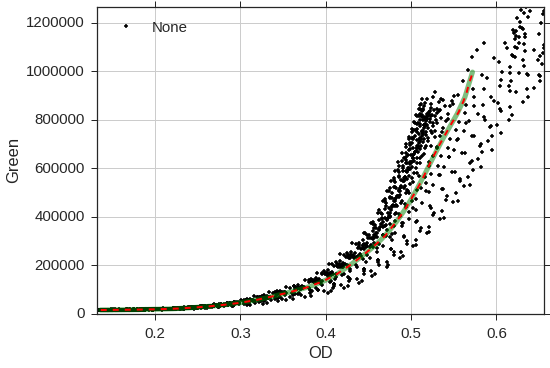

In [104]:
OD    = linspace(knots[0], knots[-1])
Green = inter.splev(OD, (knots, coefs, deg), der=0, ext=0)

df.plot('OD','Green', color='k', marker='.', ls='')
plot(OD, Green, 'g', lw=5, alpha=0.5)
plot(meangrp.OD, meangrp.Green, 'r', lw=2, ls='--')

ylim(0,df.Green.max())
xlabel('OD')
ylabel('Green');